In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [2]:
# This Churn_Modelling_Dataset.csv data set contains details of a bank's customers and the target variable 'Exited' is a binary 
# variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

# Attributes Information:
# RowNumber: Row Numbers from 1 to 10000
# CustomerId: Unique Ids for bank customer identification
# Surname: Customer's last name
# CreditScore: Credit score of the customer
# Geography: The country from which the customer belongs
# Gender: Male or Female
# Age: Age of the customer
# Tenure: Number of years for which the customer has been with the bank
# Balance: Bank balance of the customer
# NumOfProducts: Number of bank products the customer is utilising
# HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
# IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
# EstimatedSalary: Estimated salary of the customer in Dollars
# Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv('dataset/Churn_Modelling_Dataset.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.duplicated().sum()

0

## No duplicate rows found.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## No missing values detected.

## Handling outliers:

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Dropping the 'RowNumber', 'CustomerId', 'Surname' columns since they are not useful in predicting the target variable 'Exited' which indicates if the customer has closed their account with the bank or not.

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', ], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
def draw_histplot_and_boxplot(col, outliers_treated = False):
    
    word = "Before"
    
    if outliers_treated:
        word = "After"
    
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(x=col, data=df, element="bars", kde=True)
    plt.title(f'{word} treating outliers')

    plt.subplot(1,2,2)
    sns.boxplot(y=col)
    plt.ylabel(col.name)

    plt.title(f'{word} treating outliers')

In [12]:
def handle_outliers_using_emperical_rule(col):
    upper_cutoff = col.mean() + 3*col.std()
    lower_cutoff = col.mean() - 3*col.std()
    return np.where(col > upper_cutoff, upper_cutoff, np.where(col < lower_cutoff, lower_cutoff, col))

In [13]:
def handle_outliers_using_iqr(col):
    q1 = np.quantile(col, .25)
    q3 = np.quantile(col, .75)
    
    iqr = q3 - q1
    
    upper_limit = q3 + iqr * 1.5
    lower_limit = q1 - iqr * 1.5
    
    print(f'q1: {q1}')
    print(f'q3: {q3}')
    print(f'iqr: {iqr}')
    
    return np.where(col > upper_limit, upper_limit, np.where(col < lower_limit, lower_limit, col))

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


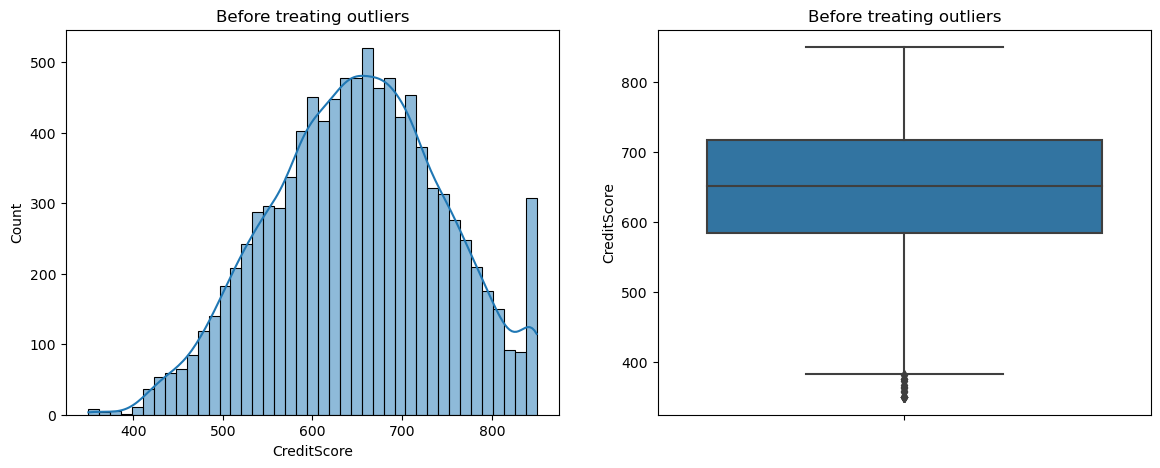

In [15]:
draw_histplot_and_boxplot(df['CreditScore'])

In [16]:
# The skewness value is slightly negative indicating that the distribution curve is negatively skewed(i.e. the distribution 
# curve is left tailed).

df['CreditScore'].skew()

-0.07160660820092675

In [17]:
# The excess kurtosis value is slightly negative indicating that the distribution curve is platykurtic(i.e. curve peak is 
# relative flatter as compared to normal distribution curve).

df['CreditScore'].kurtosis()

-0.42572568480291295

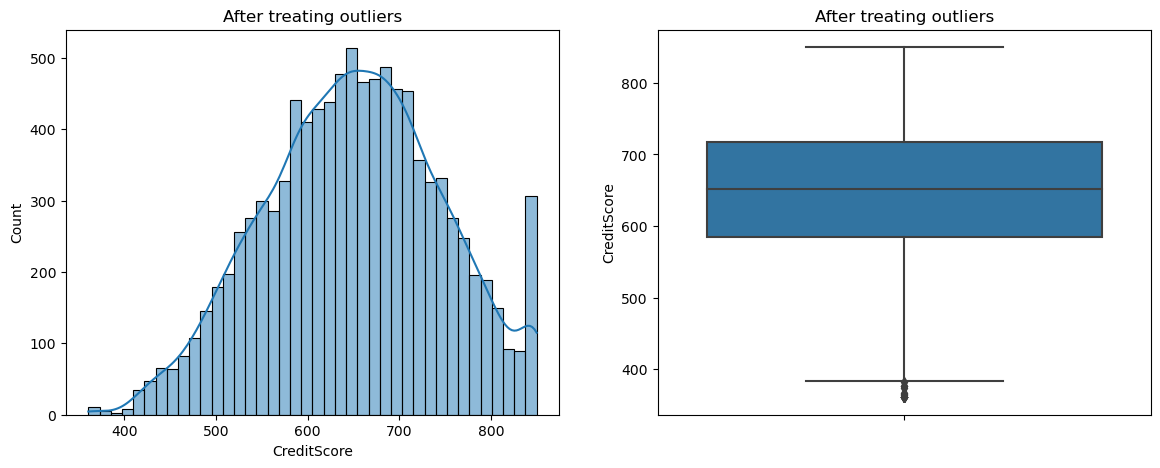

In [18]:
# Since 'CreditScore' is almost normally distributed so we use the Emperical Rule based approach to treat outliers.

col_name = 'CreditScore'

df[col_name] = handle_outliers_using_emperical_rule(df[col_name])
draw_histplot_and_boxplot(df[col_name], outliers_treated=True)

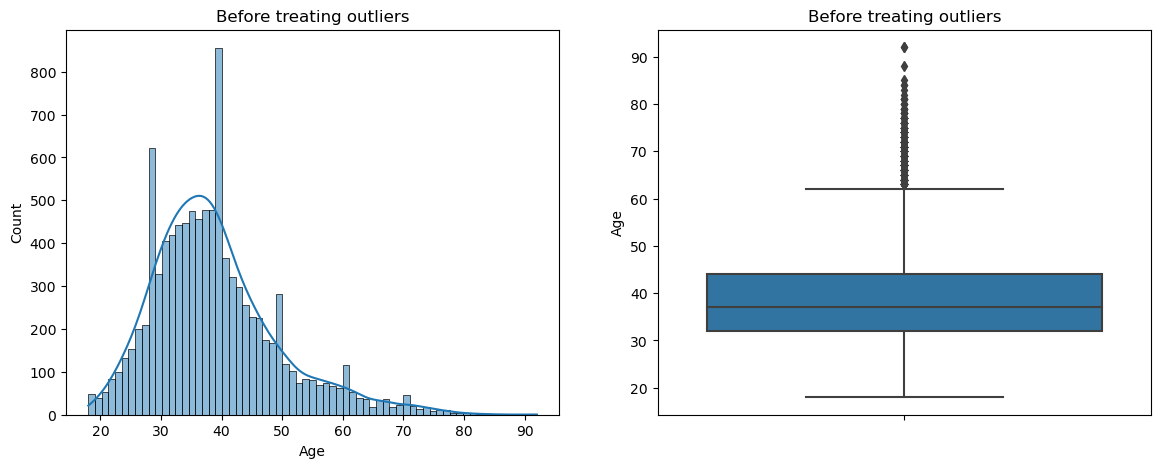

In [19]:
 draw_histplot_and_boxplot(df['Age'])

q1: 32.0
q3: 44.0
iqr: 12.0


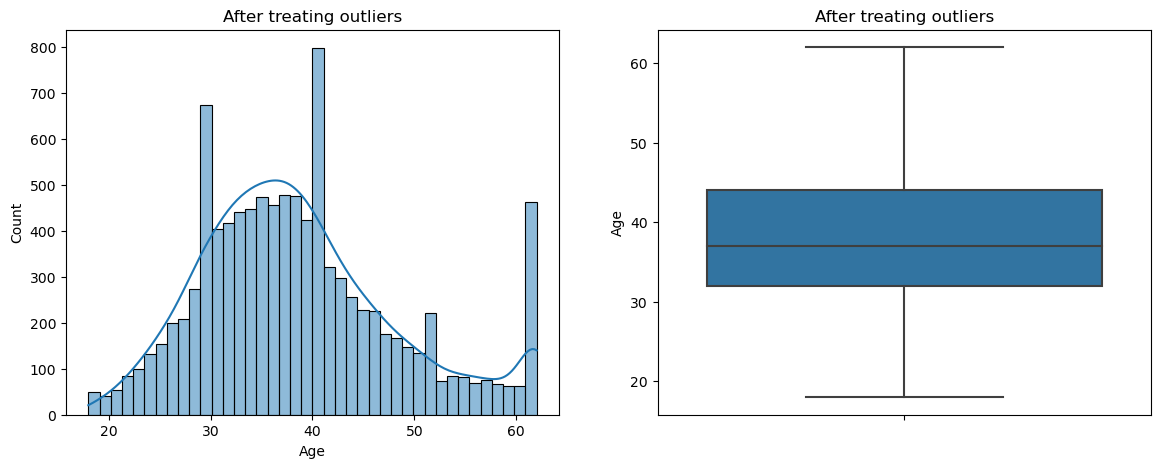

In [20]:
# Since 'Age' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'Age'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_histplot_and_boxplot(df[col_name], outliers_treated=True)

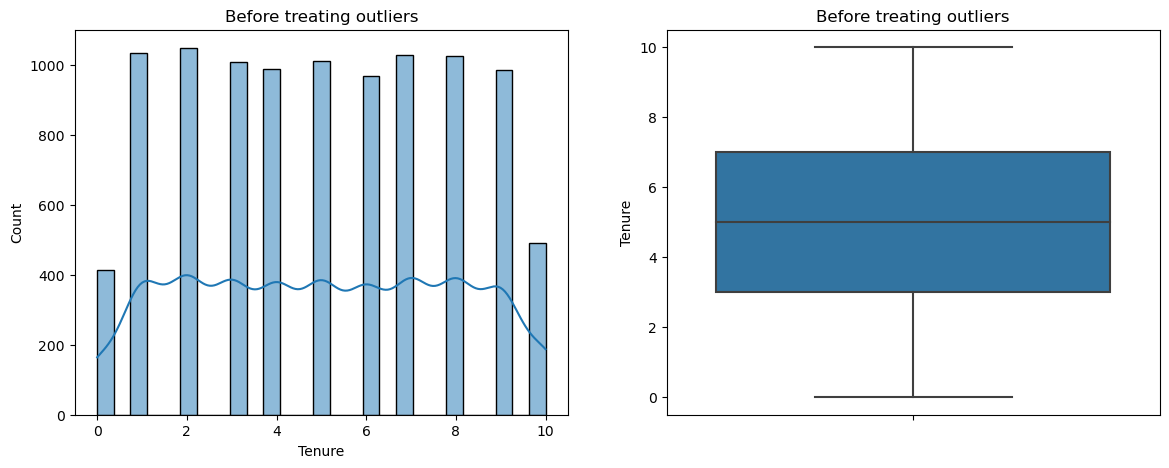

In [21]:
 draw_histplot_and_boxplot(df['Tenure'])

### No outliers detected for 'Tenure'.

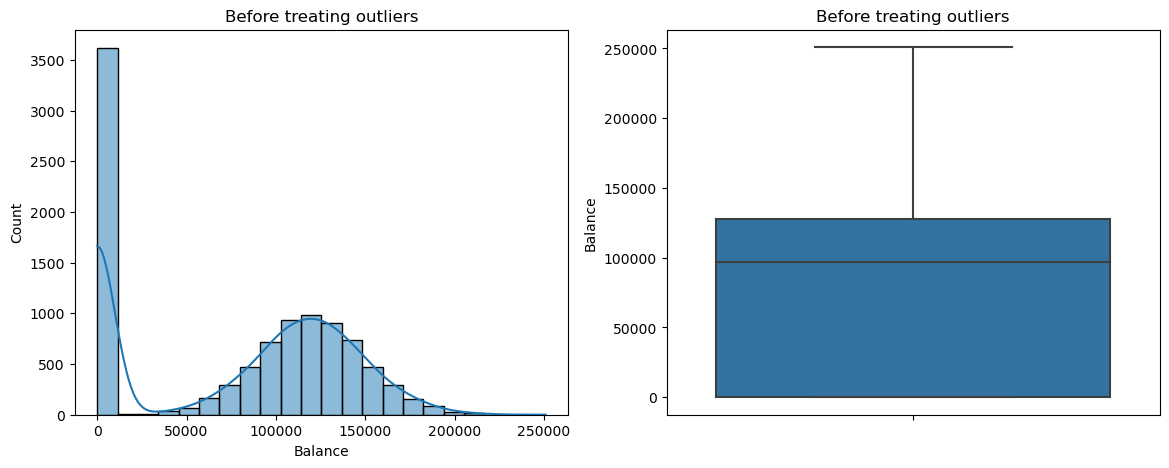

In [22]:
 draw_histplot_and_boxplot(df['Balance'])

### No outliers detected for 'Balance'.

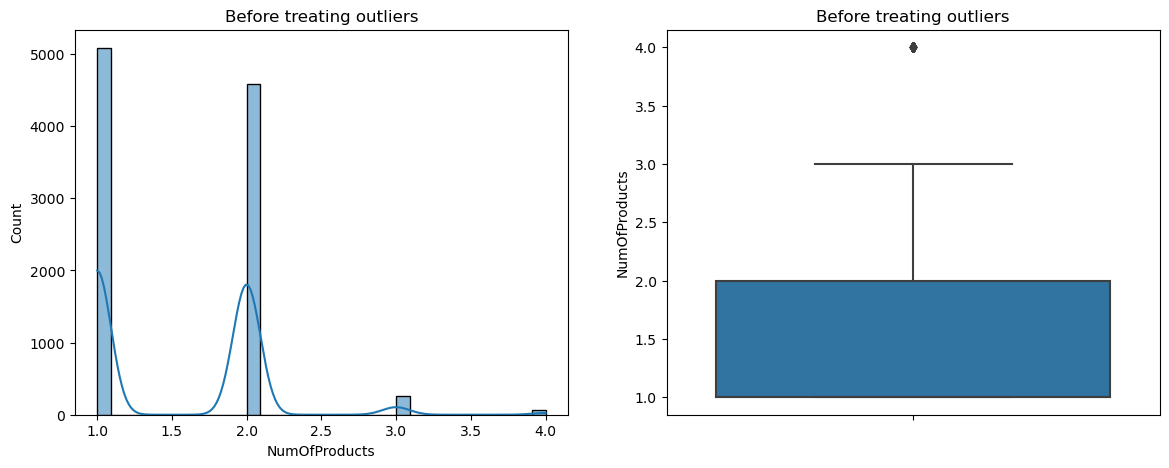

In [23]:
draw_histplot_and_boxplot(df['NumOfProducts'])

### We chose not to treat ouliers for 'NumOfProducts' because the range is narrow.

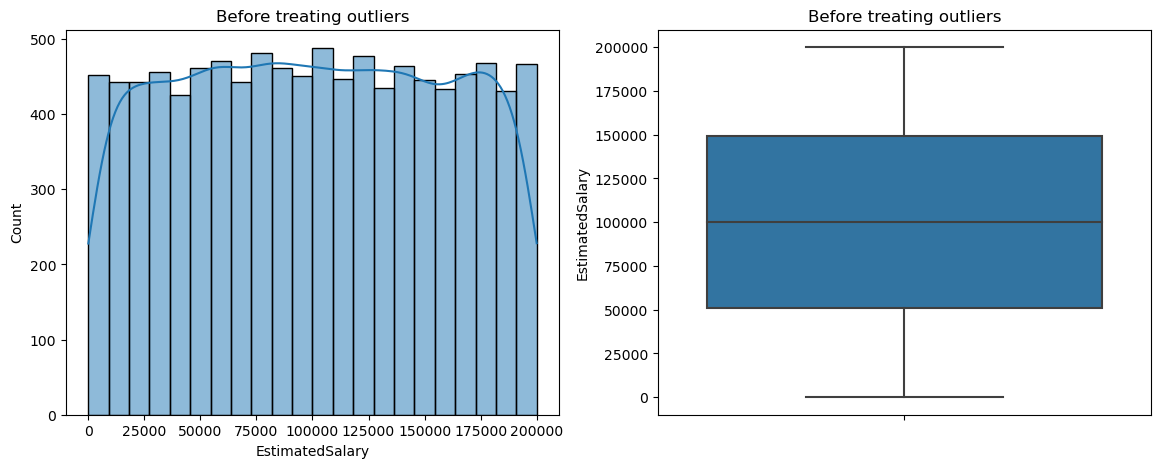

In [24]:
draw_histplot_and_boxplot(df['EstimatedSalary'])

### No outliers detected for 'EstimatedSalary'.

## Encoding:

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [26]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [27]:
df['Gender'] = df['Gender'].astype('category').cat.codes

In [28]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['Geography'])

In [30]:
df.drop(columns=['Geography_Spain'], inplace=True)

In [31]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619.0,0,42.0,2,0.00,1,1,1,101348.88,1,1,0
1,608.0,0,41.0,1,83807.86,1,0,1,112542.58,0,0,0
2,502.0,0,42.0,8,159660.80,3,1,0,113931.57,1,1,0
3,699.0,0,39.0,1,0.00,2,0,0,93826.63,0,1,0
4,850.0,0,43.0,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1,39.0,5,0.00,2,1,0,96270.64,0,1,0
9996,516.0,1,35.0,10,57369.61,1,1,1,101699.77,0,1,0
9997,709.0,0,36.0,7,0.00,1,0,1,42085.58,1,1,0
9998,772.0,1,42.0,3,75075.31,2,1,0,92888.52,1,0,1


## Data pre-processing has been done.

## Data Visualization:

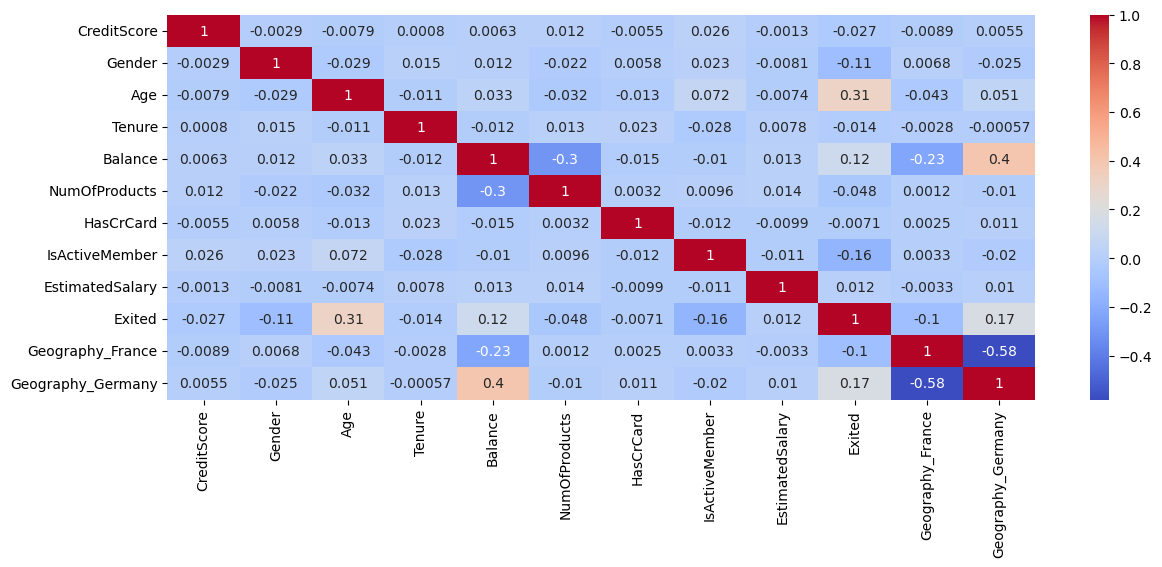

In [32]:
plt.figure(figsize = (14, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [33]:
df.corr()['Exited'].value_counts()

-0.026963    1
-0.106512    1
 0.312436    1
-0.014001    1
 0.118533    1
-0.047820    1
-0.007138    1
-0.156128    1
 0.012097    1
 1.000000    1
-0.104955    1
 0.173488    1
Name: Exited, dtype: int64

### No correlation b/w two continuous numeric variables has been found.

<Figure size 1400x500 with 0 Axes>

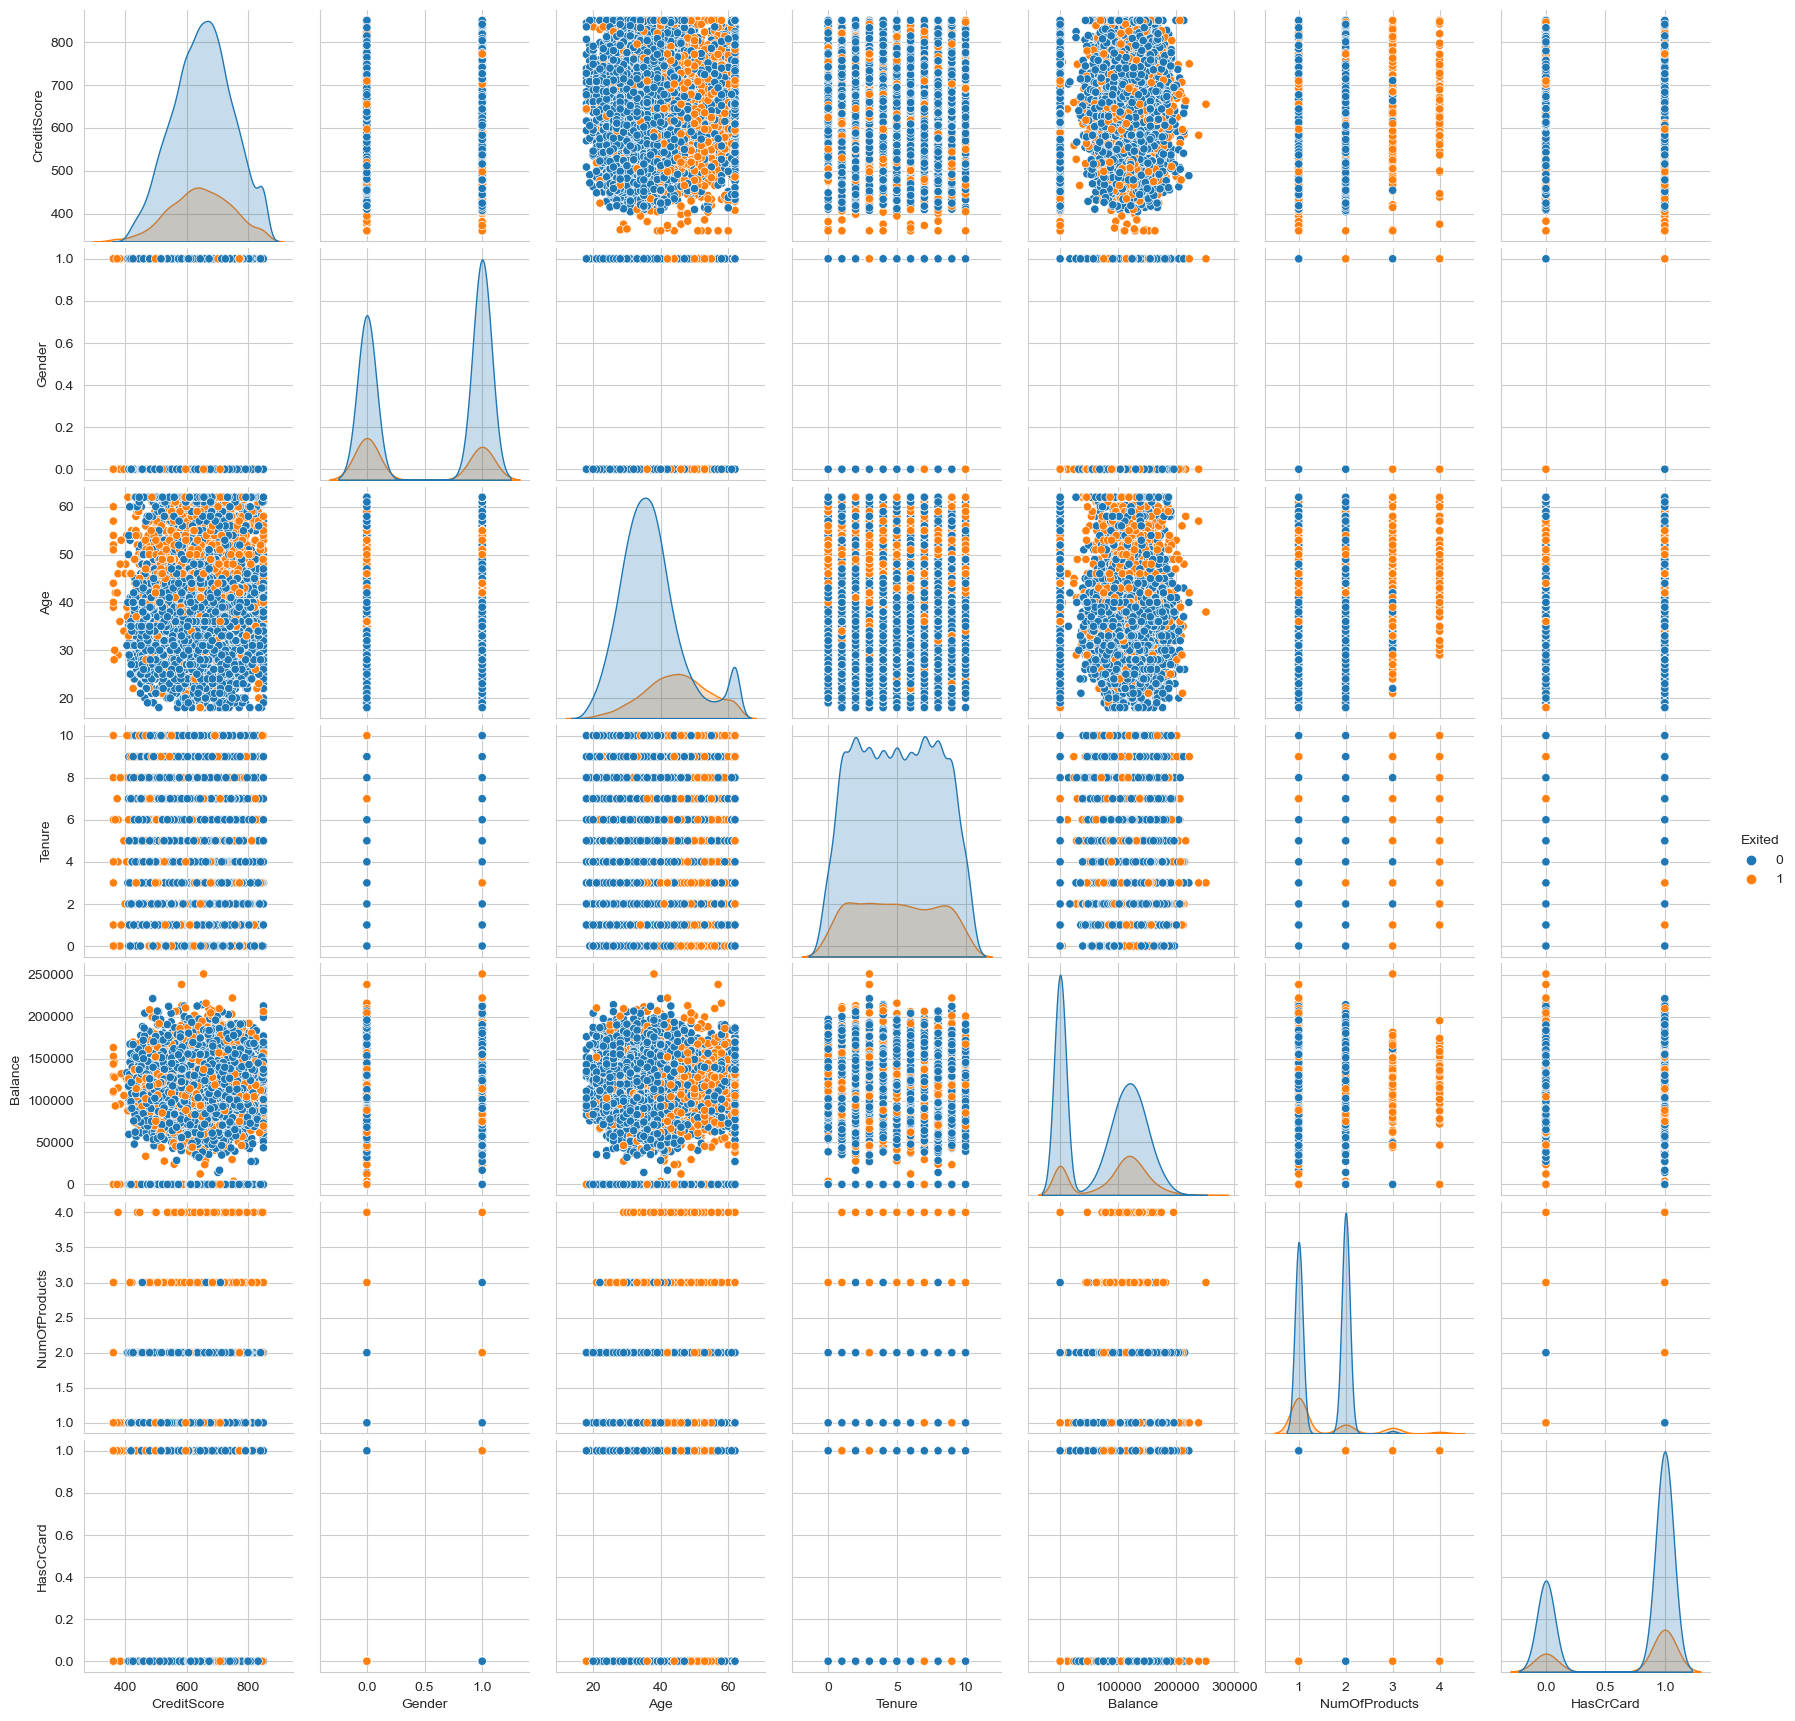

In [34]:
plt.figure(figsize = (14,5))
sns.set_style('whitegrid')
sns.pairplot(df, x_vars=['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard'], 
             y_vars=['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard'], hue='Exited')

<Figure size 1400x500 with 0 Axes>

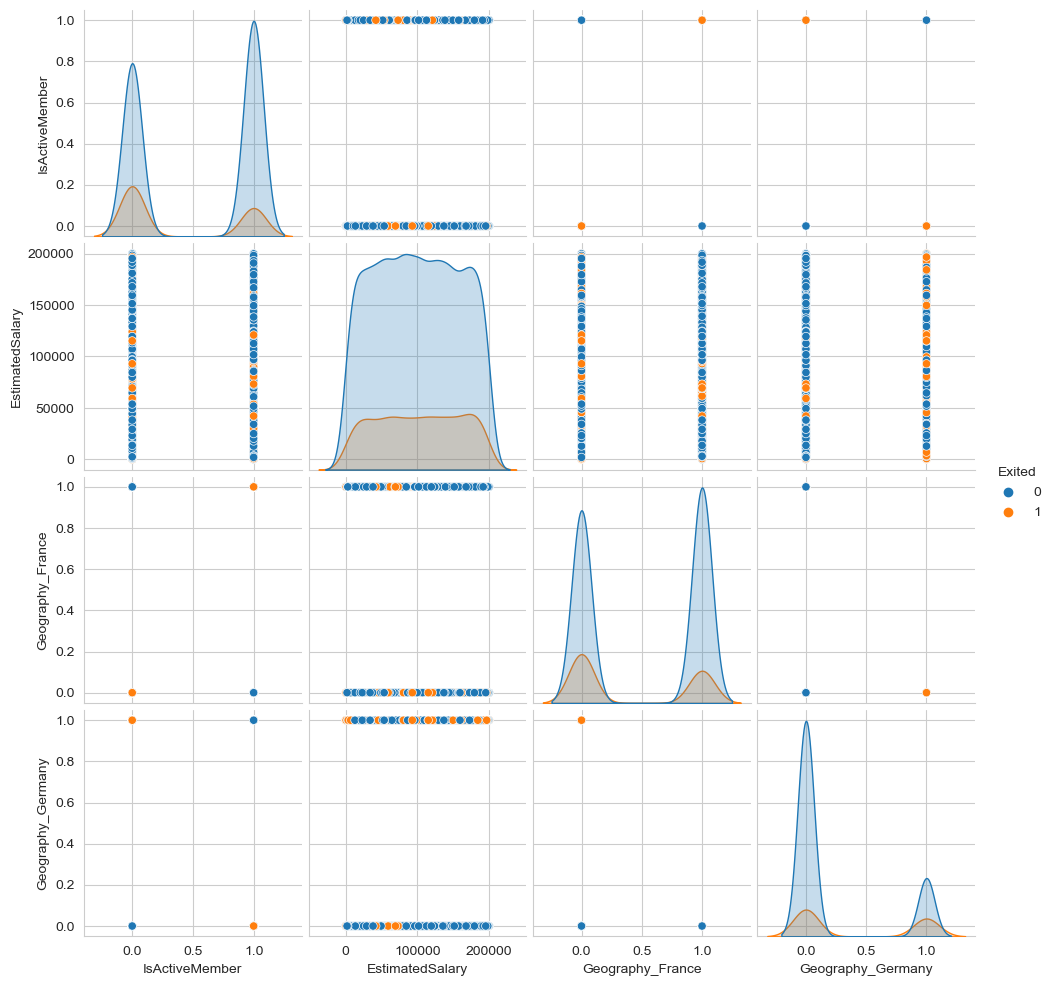

In [35]:
plt.figure(figsize = (14,5))
sns.pairplot(df, x_vars=['IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany'], 
             y_vars=['IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany'], hue='Exited')
plt.grid()

<Figure size 1400x500 with 0 Axes>

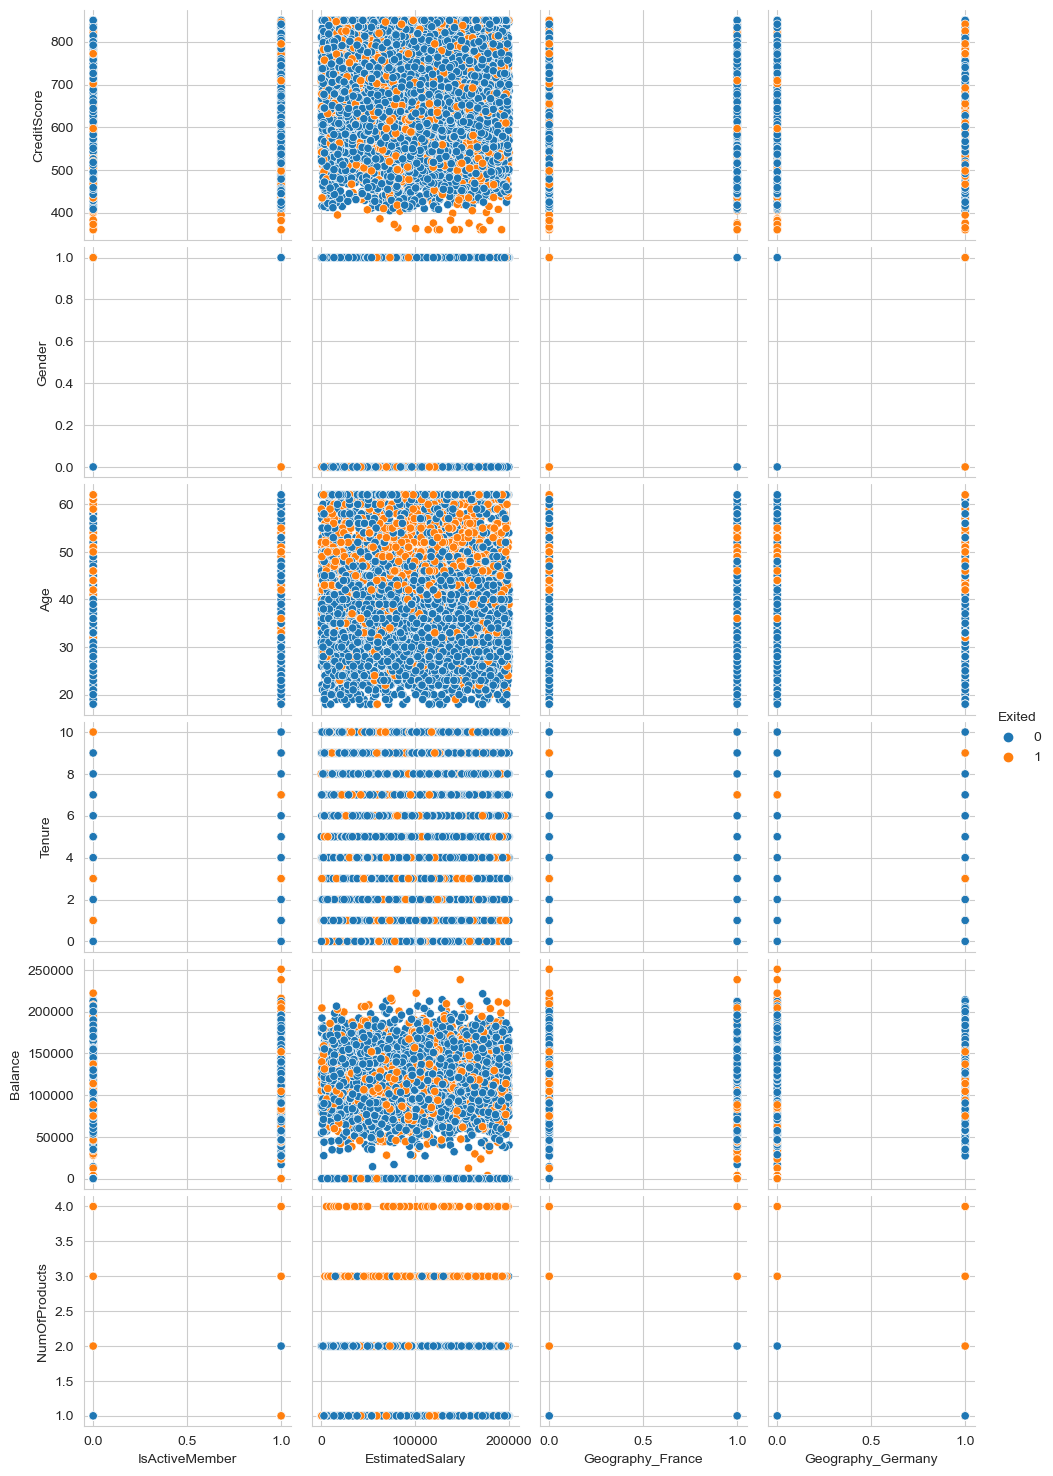

In [36]:
plt.figure(figsize = (14,5))
sns.pairplot(df, y_vars=['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts'], 
             x_vars=['IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany'], hue='Exited')

<Figure size 1400x500 with 0 Axes>

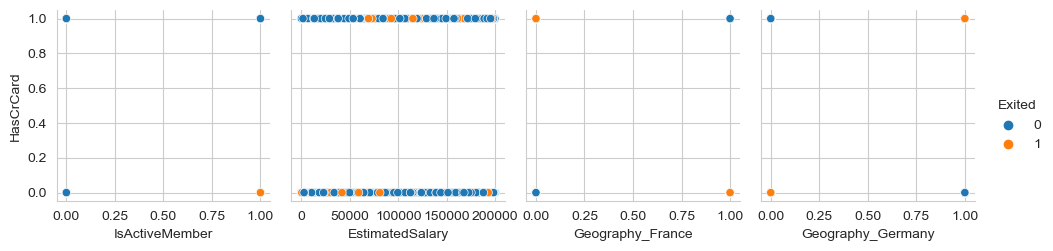

In [37]:
plt.figure(figsize = (14,5))
sns.pairplot(df, y_vars=['HasCrCard'], 
             x_vars=['IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany'], hue='Exited')

### Inference:
From the above pair plots we get the following observations:
- **Majority of the bank customers who have exited are the one whose Age is greater than 40.**
- **Among the bank customers who have NumOfProducts greater than or equal to 3, a large proportion of people have exited.**

### Visualizing the variables 'Age' vs 'Exited':

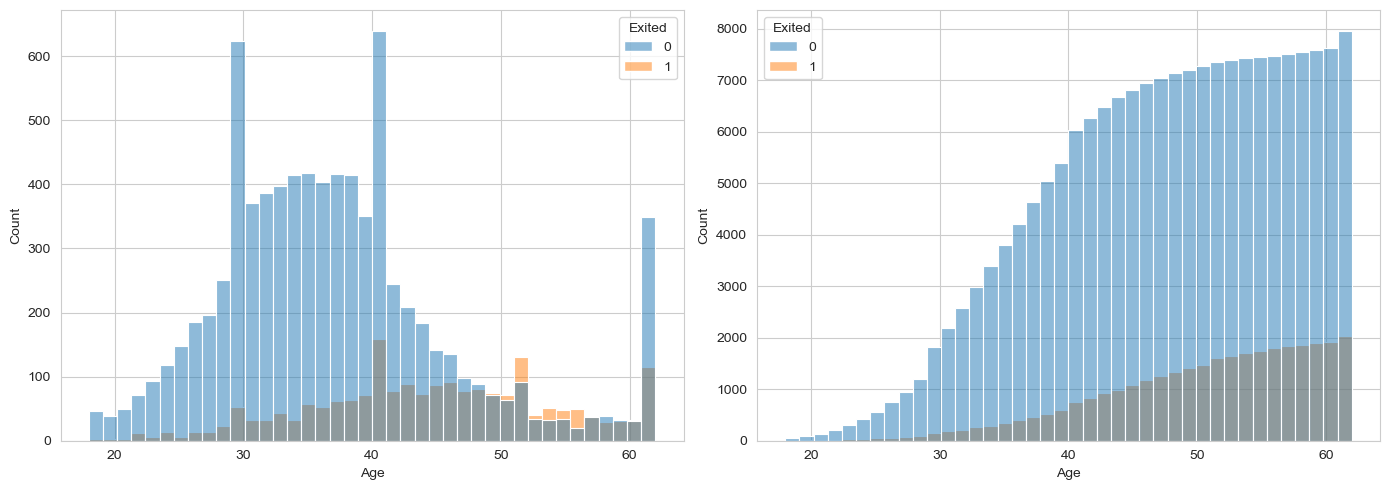

In [38]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='Age', hue='Exited')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Age', hue='Exited', cumulative=True)

plt.tight_layout()

In [39]:
(df[df['Exited'] == 1]['Age']>40).sum()

1351

In [40]:
(df[df['Exited'] == 1]['Age']<=40).sum()

686

## Inference:
**Majority of the bank customers who have exited are above 40 years of Age.**

### Visualizing the variables 'NumOfProducts' vs 'Exited':

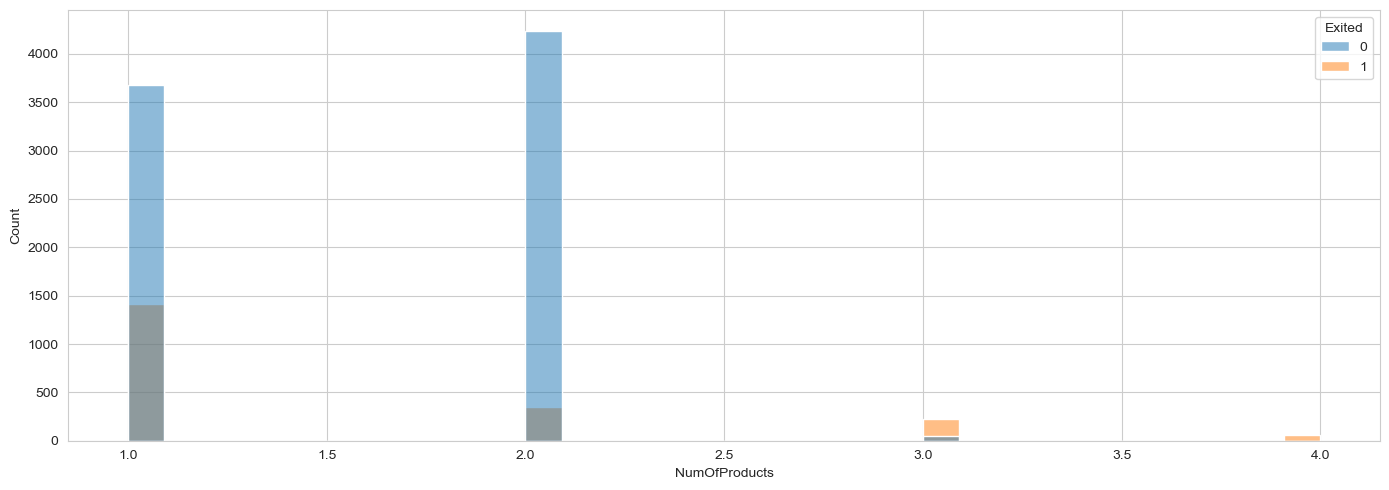

In [41]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x='NumOfProducts', hue='Exited')
plt.tight_layout()

In [42]:
df[df['Exited'] == 1]['NumOfProducts'].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [43]:
df[df['Exited'] == 0]['NumOfProducts'].value_counts()

2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64

## Inference:
**Most of the customers who have exited have NumOfProducts either 1 or 2.**

### Visualizing the variables 'Geography' vs 'Exited':

In [44]:
def draw_count_plot(data, x, hue):
    ax = sns.countplot(data=data, x=x, hue=hue)

    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f')

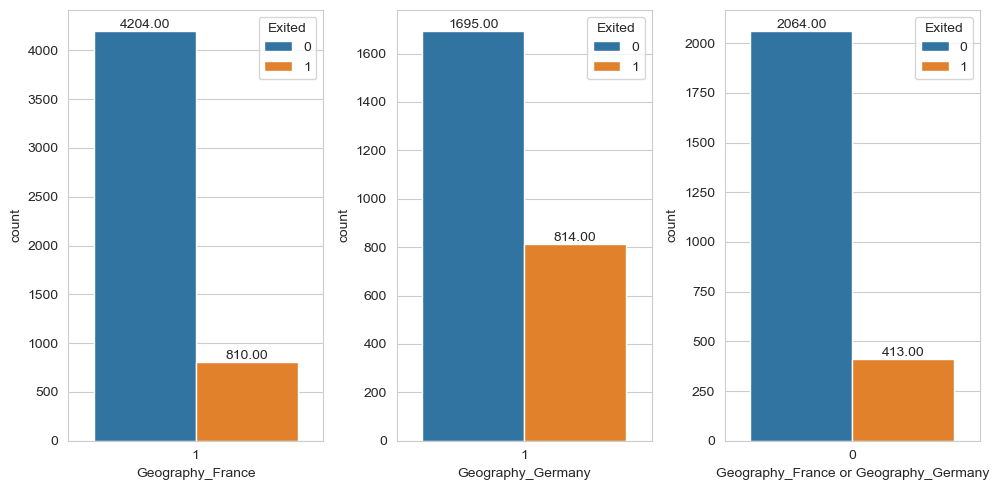

In [45]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
draw_count_plot(data=df[df['Geography_France']==1], x='Geography_France', hue='Exited')

plt.subplot(1,3,2)
draw_count_plot(data=df[df['Geography_Germany']==1], x='Geography_Germany', hue='Exited')

plt.subplot(1,3,3)
draw_count_plot(data=df[(df['Geography_France'] == 0) & (df['Geography_Germany'] == 0)], x='Geography_France', hue='Exited')

plt.xlabel('Geography_France or Geography_Germany')
plt.tight_layout()

## Inference:
**Majority of the customer who have exited are from either Germany or France.**

### Visualizing the variables 'NumOfProducts' vs 'Balance' and 'NumOfProducts' vs 'EstimatedSalary'.

In [46]:
def draw_bar_plot(df, x, y):
    ax = sns.barplot(data=df, x=x, y=y, ci=None)

    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f')

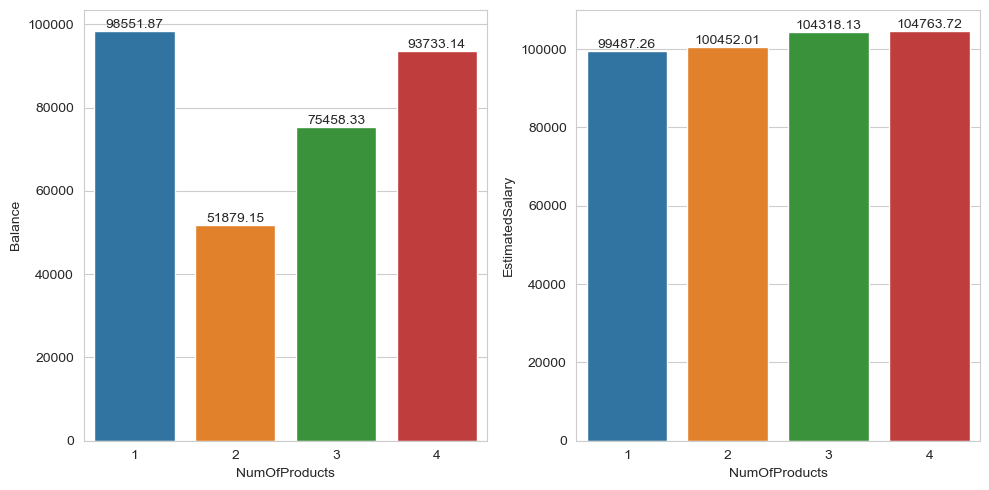

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
draw_bar_plot(df, x='NumOfProducts', y='Balance')
        
plt.subplot(1,2,2)
draw_bar_plot(df, x='NumOfProducts', y='EstimatedSalary')
        
plt.tight_layout()

## Seperating the independent and dependent variables from the dataframe:

In [48]:
x = df.drop('Exited', axis=1)
y =  df.iloc[:, [df.columns.get_loc('Exited')]]

In [49]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,619.0,0,42.0,2,0.00,1,1,1,101348.88,1,0
1,608.0,0,41.0,1,83807.86,1,0,1,112542.58,0,0
2,502.0,0,42.0,8,159660.80,3,1,0,113931.57,1,0
3,699.0,0,39.0,1,0.00,2,0,0,93826.63,1,0
4,850.0,0,43.0,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1,39.0,5,0.00,2,1,0,96270.64,1,0
9996,516.0,1,35.0,10,57369.61,1,1,1,101699.77,1,0
9997,709.0,0,36.0,7,0.00,1,0,1,42085.58,1,0
9998,772.0,1,42.0,3,75075.31,2,1,0,92888.52,0,1


In [50]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## Feature Scaling:

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
sc_x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
sc_x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,-0.326359,-1.095988,0.342615,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736
1,-0.440197,-1.095988,0.240011,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736
2,-1.537186,-1.095988,0.342615,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736
3,0.501557,-1.095988,0.034803,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736
4,2.064249,-1.095988,0.445219,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246682,0.912419,0.034803,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736
9996,-1.392301,0.912419,-0.375612,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736
9997,0.605047,-1.095988,-0.273008,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736
9998,1.257031,0.912419,0.342615,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904


## Checking Data Imbalance:

In [53]:
'''
    Dataset is imbalanced balanced because the #'Not Exited' samples > 2 * #'Exited' samples. 
'''
y.value_counts()

Exited
0         7963
1         2037
dtype: int64

In [54]:
def draw_pie_chart_for_exited(col):
    plt.pie(col.value_counts(), autopct="%.2f", labels=['Not Exited', 'Exited'])
plt.show()

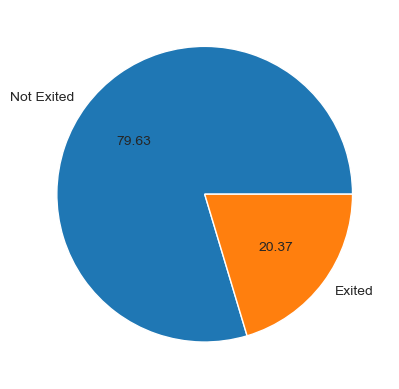

In [55]:
draw_pie_chart_for_exited(y)

## Handling Imbalanced Data:

In [56]:
# !pip install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smote = SMOTE(random_state=1234)

# Creating synthetic samples for minority class to handle data imbalance.
x_resampled, y_resampled = smote.fit_resample(sc_x, y)

In [59]:
sc_x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,-0.326359,-1.095988,0.342615,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736
1,-0.440197,-1.095988,0.240011,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736
2,-1.537186,-1.095988,0.342615,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736
3,0.501557,-1.095988,0.034803,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736
4,2.064249,-1.095988,0.445219,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246682,0.912419,0.034803,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736
9996,-1.392301,0.912419,-0.375612,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736
9997,0.605047,-1.095988,-0.273008,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736
9998,1.257031,0.912419,0.342615,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904


In [60]:
x_resampled.shape

(15926, 11)

In [61]:
y_resampled.shape

(15926, 1)

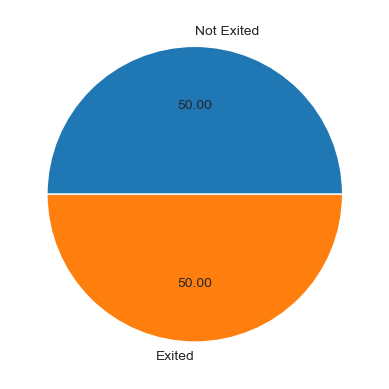

In [62]:
draw_pie_chart_for_exited(y_resampled)

## Split the data into training and test dataset.

In [63]:
from sklearn.model_selection import train_test_split

'''
    We used the 'stratify' keyword argument so as to avoid the biased random sampling problem while splitting the dataset 
    into train and test datasets. In other words we wanted the ratio of the positve class to negative class in both train and
    test datasets to remain almost same as in the original dataset before splitting.
'''
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=1234, 
                                                    stratify=y_resampled)

In [64]:
x_train.shape

(11944, 11)

In [65]:
y_train.shape

(11944, 1)

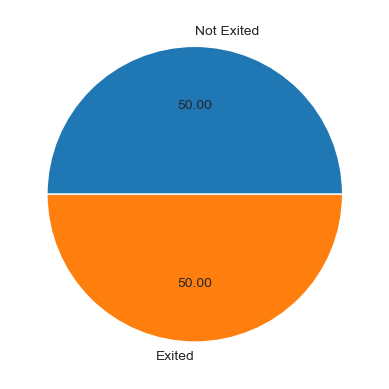

In [66]:
draw_pie_chart_for_exited(y_train)

In [67]:
x_test.shape

(3982, 11)

In [68]:
y_test.shape

(3982, 1)

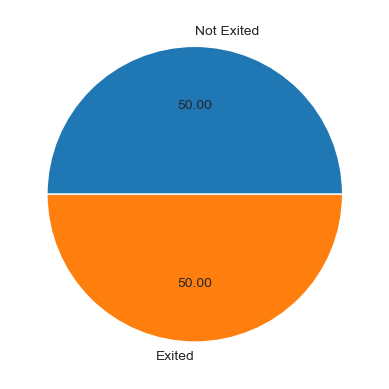

In [69]:
draw_pie_chart_for_exited(y_test)

## Building the Bagging based model:

**Bagging** is an **ensemble** method in which **multiple base learners which are overfitted models**(overfitted model means the model performs well on the training data but not so well on the test data) are used to build one powerful model. These base learners are also known as **weak learners** and they need not be of the same type. The idea of bagging rely on the concept of **'Wisdom of the Crowd'** which means that each weak learner will be trained on a different subset of the original dataset and the results of the prediction from each of the weak learner is combined to get the final prediction. The **advantage of the Bagging process is that the prediction accuracy gets improved** and the **overfitting problem gets reduced** which existed when a model was used individually to make predictions.

**Steps involved in Bagging:**
1. **Bootstrapping:** In traditional bootstrapping a **bootstrap sample** is created by random sampling of the datapoints/training 
instances from the original dataset, with replacement. **q** number of such bootstrap samples are created and the size of each
bootstrap sample is equal to the size of the original dataset **n**. Using each bootstrap sample one base learner is trained.

2. **Aggregation:** The results of each base learner are combined depending on the type of problem at hand. For example, in the 
case of a regression problem, the arithmetic mean of the results from each base estimator is taken and outputted as the final 
result. In the case of a classification problem, the class label that has got the majority vote is outputted as the final 
result.

Each bootstrap sample will have a corresponding **out-of-bag sample** which includes the data points in the original dataset that couldn't make it into the bootstrap sample **D_i**. This out-of-bag sample would be used to test the base learner trained on the training set **D_i**. **When traditional bootstrapping is used each training instance has around 63% chance of being in the bootstrap sample D_i on an average which means 37% of the data points in D_i are repetitions. That is why out-of-bag samples are most likely not empty.**

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
# bootstrap_features = False by default which means features are drawn without replacement.
# max_features=1.0 by default which means 'max_features * X.shape[1]` number features of features would be used for training 
# each base learner.

# max_samples=1.0 by default which means `max_samples * X.shape[0]` number of samples/training instances would be drawn from 
# the original dataset.
# bootstrap=True which means resampling would occur with replacement in order to create the boostrap samples.

# base_estimator=None which means the sklearn.tree.DecisionTreeClassifier would be our base learner.


bagging = BaggingClassifier(n_estimators=25, oob_score=True, random_state=1234)
bagging.fit(x_train, y_train.values.ravel())

BaggingClassifier(n_estimators=25, oob_score=True, random_state=1234)

In [72]:
# Making predictions:

y_pred_train_bag = bagging.predict(x_train)
y_pred_test_bag = bagging.predict(x_test)

In [73]:
# Evaluating the Bagging Classifier based model:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
# https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format

def draw_confusion_matrix(y_true, y_pred, c_matrix_for):
    labels = ['Not Exited', 'Exited']
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.0f', xticklabels=labels, 
            yticklabels=labels, cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {c_matrix_for}')
    plt.show()

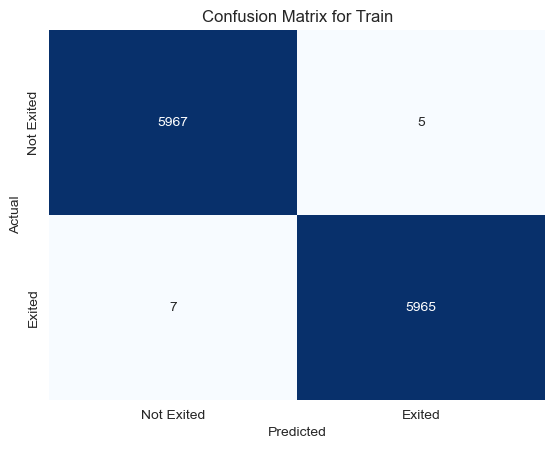

In [75]:
draw_confusion_matrix(y_train, y_pred_train_bag, c_matrix_for='Train')

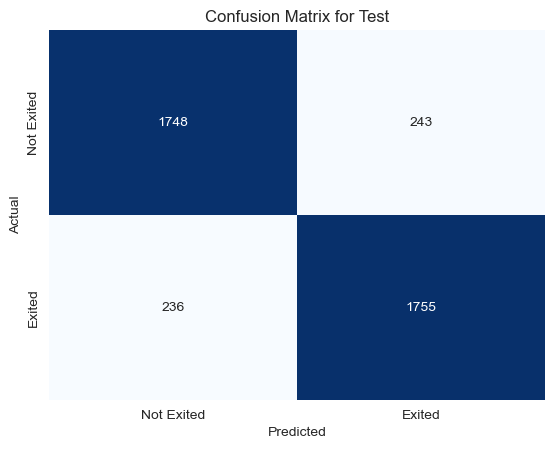

In [76]:
draw_confusion_matrix(y_test, y_pred_test_bag, c_matrix_for='Test')

In [77]:
print('For Train data:')
print(classification_report(y_train, y_pred_train_bag))

For Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944



In [78]:
print('For Test data:')
print(classification_report(y_test, y_pred_test_bag))

For Test data:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1991
           1       0.88      0.88      0.88      1991

    accuracy                           0.88      3982
   macro avg       0.88      0.88      0.88      3982
weighted avg       0.88      0.88      0.88      3982



In [79]:
accuracy_score(y_train, y_pred_train_bag)

0.9989953114534494

In [80]:
accuracy_score(y_test, y_pred_test_bag)

0.8797086891009543

In [81]:
'''
    Bagging score is defined as the proportion of correctly classified samples from the out of bags samples. Even if we set
    max_samples=1.0 as the keyword argument in BaggingClassifier() the out of bagging samples will not be zero if we use
    bootstrap=True which means we sample with replacement.
'''
bagging.oob_score_

0.8662926992632284

### Performing cross validation to get a more representative estimate for the Bagging based model's accuracy using training data:

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
accuracy_bag = cross_val_score(bagging, x_train, y_train.values.ravel(), cv=10)
accuracy_bag

array([0.88619247, 0.88200837, 0.87280335, 0.88200837, 0.86432161,
       0.87855946, 0.88944724, 0.87437186, 0.88693467, 0.86180905])

In [84]:
accuracy_bag.mean()

0.8778456438398408

## Building the Random Forest based model:

**Random Forest is based on the Bagging technique** but in contrast to Bagging where base learners can be of different types, **in Random Forest the base learners are all Decision Trees**. Another **notable thing in Random Forest is the concept of Feature Bagging.** In Random Forest, **Feature Bagging means that at each node in the Decision Tree a fixed size(u) subset of the m available features is taken randomly and used to determine the best feature for the split at that node.**

This **Feature Bagging leads to diverse Decison Trees/base learners** because each Decision Tree will focus on different subsets of the available features and capture different aspects of the data.

Secondly, **Feature Bagging also leads to de-correlated/independent Decision Trees** which means our trees won't be similar 
and they would not make similar mistakes and combining the predictions of such base learners would give the best 
prediction.

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
random_forest = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=1234, oob_score=True, bootstrap=True)
random_forest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=25, oob_score=True,
                       random_state=1234)

In [87]:
# Making predictions:

y_pred_train_rf = random_forest.predict(x_train)
y_pred_test_rf = random_forest.predict(x_test)

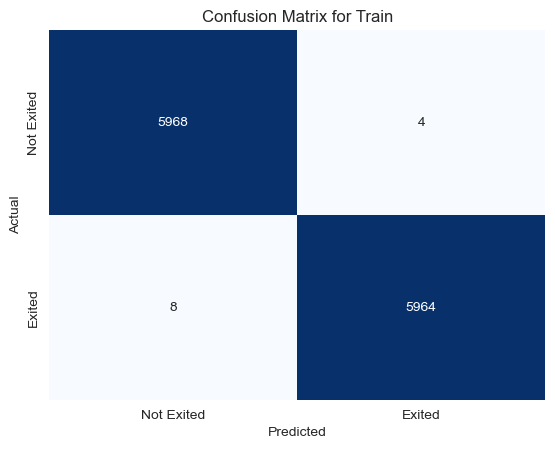

In [88]:
# Evaluating the Random Forest Classifier based model:

draw_confusion_matrix(y_train, y_pred_train_rf, c_matrix_for='Train')

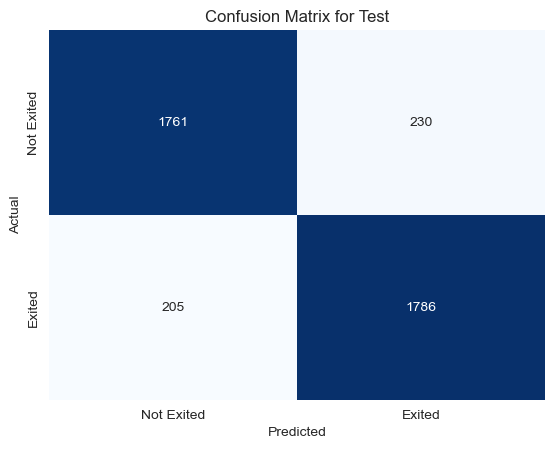

In [89]:
draw_confusion_matrix(y_test, y_pred_test_rf, c_matrix_for='Test')

In [90]:
print('For Train data:')
print(classification_report(y_train, y_pred_train_rf))

For Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944



In [91]:
print('For Test data:')
print(classification_report(y_test, y_pred_test_rf))

For Test data:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1991
           1       0.89      0.90      0.89      1991

    accuracy                           0.89      3982
   macro avg       0.89      0.89      0.89      3982
weighted avg       0.89      0.89      0.89      3982



In [92]:
accuracy_score(y_train, y_pred_train_rf)

0.9989953114534494

In [93]:
accuracy_score(y_test, y_pred_test_rf)

0.8907584128578604

In [94]:
random_forest.oob_score_

0.8737441393168118

### Performing cross validation to get a more representative estimate for the Random Forest based model's accuracy using training data:

In [95]:
accuracy_rf = cross_val_score(bagging, x_train, y_train.values.ravel(), cv=10)
accuracy_rf

array([0.88619247, 0.88200837, 0.87280335, 0.88200837, 0.86432161,
       0.87855946, 0.88944724, 0.87437186, 0.88693467, 0.86180905])

In [96]:
accuracy_rf.mean()

0.8778456438398408

## Conclusion:

**For the BaggingClassifier based model:**
- Train Accuracy: **99.90%**
- Test Accuracy: **87.97%**
- OOB score(Accuracy using the out of bag samples): **86.63%**
- Train Accuracy with 10 fold stratified cross validation: **87.78%**
    
**For the RandomForestClassifier based model:**
- Train Accuracy: **99.90%**
-  Accuracy: **89.10%**
- OOB score(Accuracy using the out of bag samples): **87.37%**
- Train Accuracy with 10 fold stratified cross validation: **87.78%**